In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

%config InlineBackend.figure_format = 'retina'

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
results_folder = "Replicated_model_results"

## batch run

In [3]:
batch_results = pd.read_csv(results_folder+"/batch_run_500_agents.csv")


In [4]:
baseline_batch = batch_results.query("update_method == 'update_op_Deffuant'")
exp1_batch = batch_results.query("update_method == 'update_op_P'")
exp2_batch = batch_results.query("update_method == 'update_op_P_and_B'")
exp3_batch = batch_results.query("update_method == 'update_op_P_and_R'")
exp5_batch = batch_results.query("update_method == 'update_op_all'")

## baseline (deffuant model results)

In [5]:
baseline_agents = pd.read_csv(results_folder+"/basline_agent_data.csv")
num_agents = len(baseline_agents['AgentID'].unique())

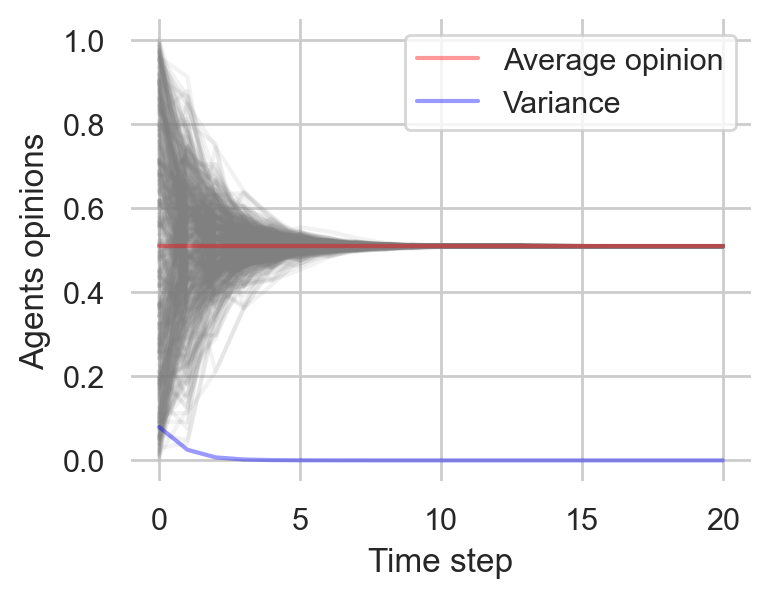

In [9]:
## opinions dynamics of 500 agents over 20 steps ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
    
# needed data
sub_data = baseline_agents.query("Step < 21")

# plotting
for i in range(num_agents):
    sns.lineplot(x = "Step", y = "opinion", data = sub_data.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)


sns.lineplot(x="Step", y="opinion", data=sub_data.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(x="Step", y="opinion", data=sub_data.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=sub_data.groupby("Step")["opinion"].std().reset_index() , label = "std" , color = 'green', alpha = 0.4)

# plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")

plt.legend()

plt.show()

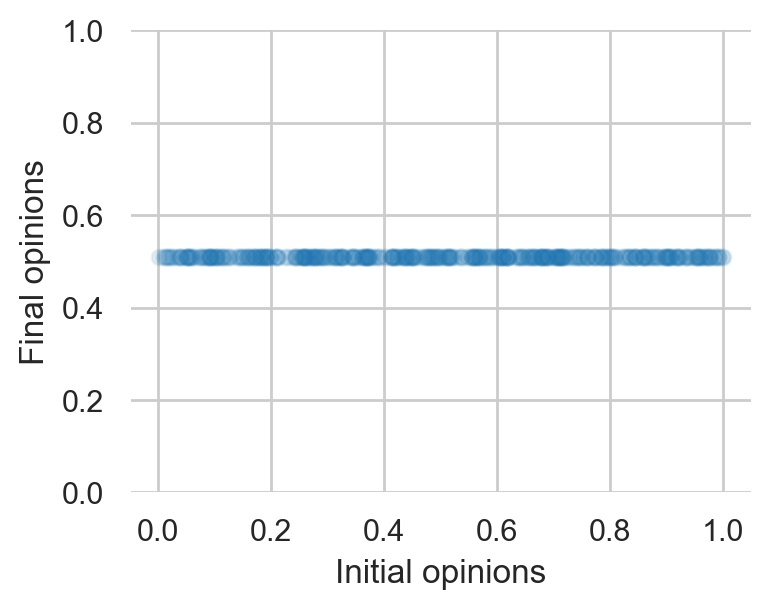

In [10]:
## final opinions of 500 agents as function of initial opinions ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

    
# needed data
last_step = baseline_agents['Step'].tail(1).values[0]

initial_op = list(baseline_agents.query("Step == 0")['opinion'])
final_op = list(baseline_agents.query("Step == @last_step")['opinion'])

# plotting 
# plt.scatter(x = initial_op, y = final_op, marker='o', s = 20, alpha = 0.1, facecolor='none', edgecolor="red")
plt.scatter(x = initial_op, y = final_op, marker='o', s = 30, alpha = 0.1, color = "tab:blue")

plt.xlabel('Initial opinions')
plt.ylabel('Final opinions')
# plt.xlim(0,1)
plt.ylim(0,1)


plt.show()

## Batch Run

In [28]:
# num_agents = len(baseline_batch['AgentID'].unique())


# # figure format 
# plt.figure(figsize=(4,  3))

# for pos in ['right', 'top', 'bottom', 'left']: 
#     plt.gca().spines[pos].set_visible(False) 
    
# # needed data
# sub_data = baseline_batch.query("Step < 21")

# # plotting
# for i in range(num_agents):
#     # sns.lineplot(x = "Step", y = "opinion", data = exp1_agents.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)
#     sns.lineplot(x="Step", y="opinion", data=sub_data.query(f"AgentID == {i}").groupby("Step")["opinion"].mean().reset_index(), color = 'grey', alpha = 0.1)
    
# sns.lineplot(x="Step", y="opinion", data=sub_data.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=sub_data.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)

# plt.ylim(0,1)
# plt.xlabel("Time step")
# plt.ylabel("Agents opinions")


# plt.show()

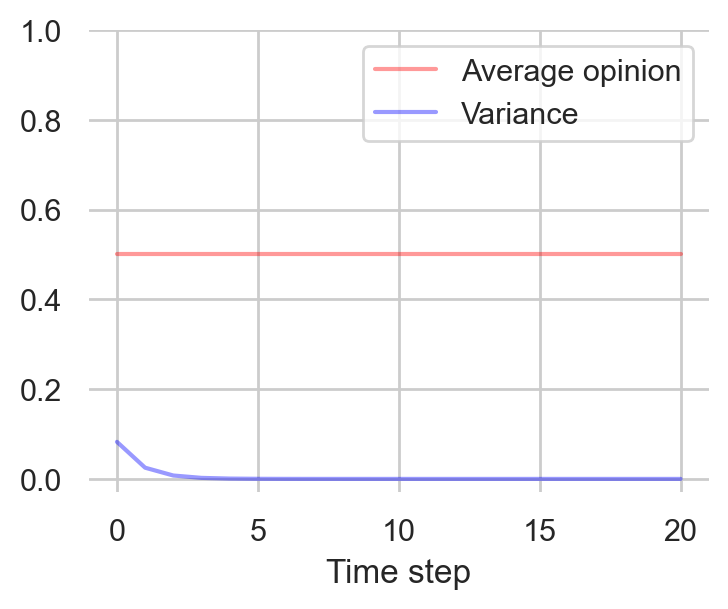

In [11]:
num_agents = len(baseline_batch['AgentID'].unique())


# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
# needed data
sub_data = baseline_batch.query("Step < 21")
aggregated_results = sub_data.groupby(['iteration', 'Step'])['opinion'].agg(['mean', 'var']).reset_index()
    
sns.lineplot(data=aggregated_results.groupby("Step")['mean'].mean(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(data=aggregated_results.groupby("Step")['var'].mean(), label = "Variance", color = 'blue', alpha = 0.4)

plt.ylim(-0.03,1)
plt.xlabel("Time step")
plt.ylabel("")


plt.show()

In [8]:
# # figure format 
# plt.figure(figsize=(4,  3))

# for pos in ['right', 'top', 'bottom', 'left']: 
#     plt.gca().spines[pos].set_visible(False) 

    
# # needed data
# last_step = baseline_batch['Step'].tail(1).values[0]

# initial_op = list(baseline_batch.query("Step == 0")['opinion'])
# final_op = list(baseline_batch.query("Step == @last_step")['opinion'])

# # plotting 
# plt.scatter(x = initial_op, y = final_op, marker='o', s = 20, alpha = 0.1, facecolor='none', edgecolor="red")

# plt.xlabel('Initial opinions')
# plt.ylabel('Final opinions')
# plt.xlim(0,1)
# plt.ylim(0,1)


# plt.show()

## Exp 1: peer trust

In [13]:
exp1_agents = pd.read_csv(results_folder+"/exp1_p_agent_data.csv")
num_agents = len(exp1_agents['AgentID'].unique())

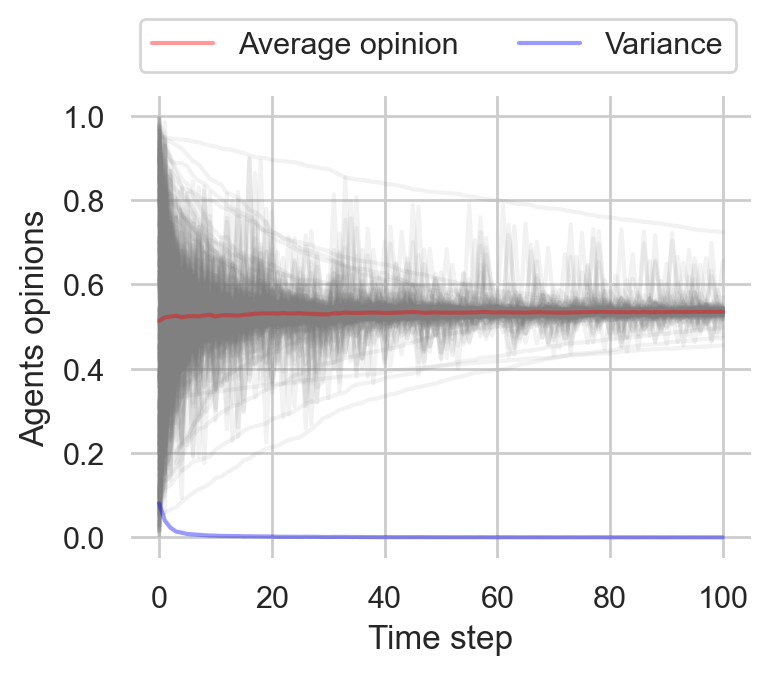

In [14]:
## opinions dynamics of 500 agents over 20 steps ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
    
# needed data
# sub_data = baseline_agents.query("Step < 21")

# plotting
for i in range(num_agents):
    sns.lineplot(x = "Step", y = "opinion", data = exp1_agents.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)

sns.lineplot(x="Step", y="opinion", data=exp1_agents.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(x="Step", y="opinion", data=exp1_agents.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp1_agents.groupby("Step")["opinion"].std().reset_index() , label = "std" , color = 'green', alpha = 0.4)

# plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")

# plt.legend(bbox_to_anchor =(0.43, 0.73), ncol = 1)
plt.legend(bbox_to_anchor =(1, 1.2), ncol = 2)


plt.show()

### detailed plots (categorize agents based on peer trust value):
- low PT : less than 0.3
- Medium PT : between 0.3 and 0.7 (around 0.5)
- High PT : more than 0.7

In [4]:
# # figure format 
# plt.figure(figsize=(4,  3))

# for pos in ['right', 'top', 'bottom', 'left']: 
#     plt.gca().spines[pos].set_visible(False) 
    

# # plotting
# for i in range(num_agents):
#     if list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] > 0.7:
#         c = 'red'
#     elif list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] < 0.3:
#         c = 'blue'
#     else:
#         c = 'green'
    
#     sns.lineplot(x = "Step", y = "opinion", data = exp1_agents.query(f"AgentID == {i}"), color = c , alpha = 0.1)

# # plt.ylim(0,1)
# plt.xlabel("Time step")
# plt.ylabel("Agents opinions")


# plt.show()

## High peer trust

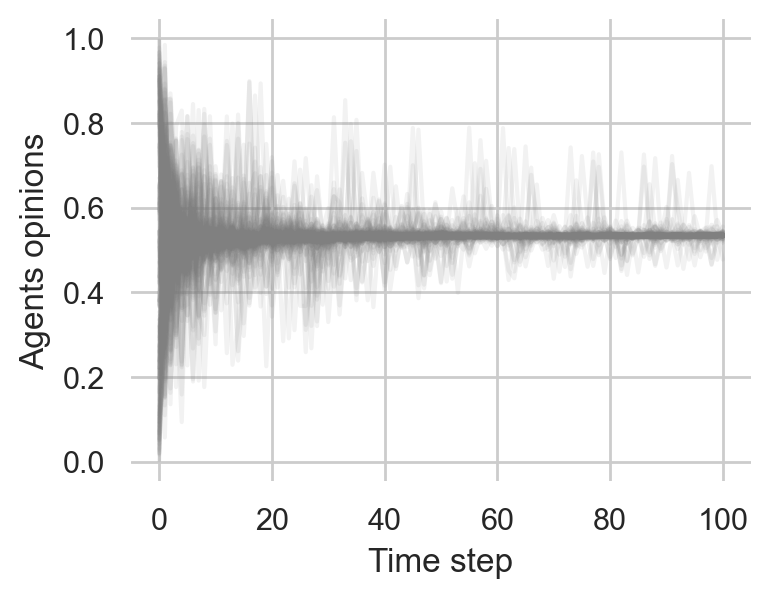

156


In [15]:
# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
# plotting 
c = 0
for i in range(num_agents):
    if list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] >= 0.7:
#         c = 'red' 
#         sns.lineplot(x = "Step", y = "opinion", data = exp1_agents.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        c+=1
        sns.lineplot(x = "Step", y = "opinion", data = exp1_agents.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)

# sns.lineplot(x="Step", y="opinion", data=exp1_agents.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp1_agents.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)


# plt.ylim(0, 1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")

plt.show()

print(c)

## Medium peer trust

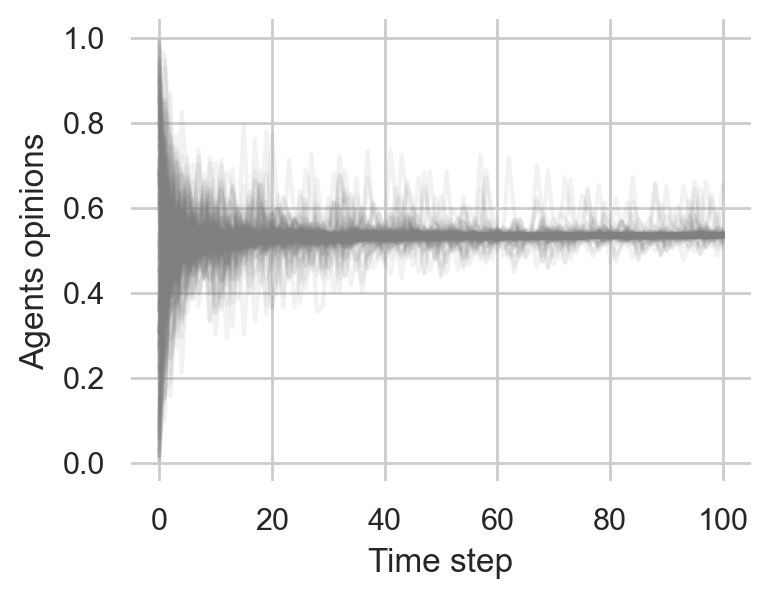

203


In [16]:
# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
       
        
# plotting 
c = 0
for i in range(num_agents):
    if list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] > 0.3 and list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] < 0.7:
#         c = 'green'
        c+=1
        sns.lineplot(x = "Step", y = "opinion", data = exp1_agents.query(f"AgentID == {i}"), color = "grey" , alpha = 0.1)

# sns.lineplot(x="Step", y="opinion", data=exp1_agents.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp1_agents.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)


# plt.ylim(0, 1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")

plt.show()

print(c)

## Low peer trust

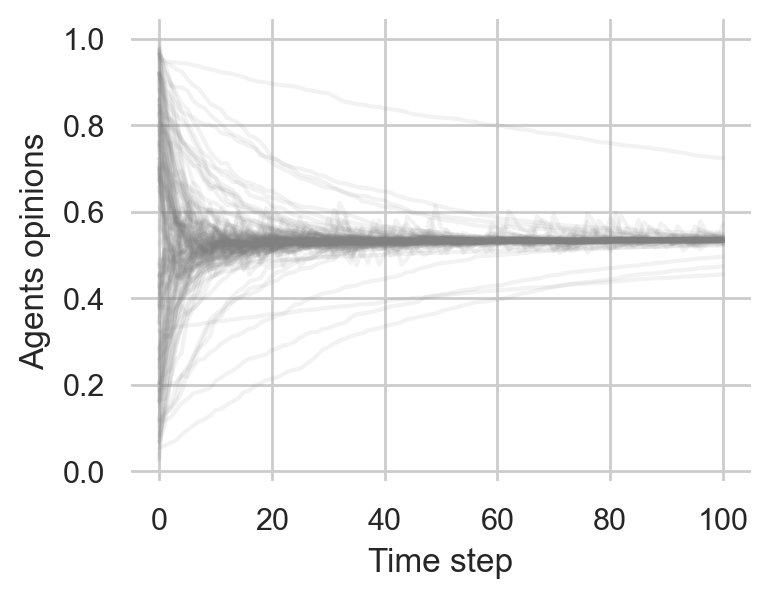

141


In [17]:
# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
       
        
# plotting 
c = 0
for i in range(num_agents):
    if list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] <= 0.3:
#         c = 'blue'
        c+=1
        sns.lineplot(x = "Step", y = "opinion", data = exp1_agents.query(f"AgentID == {i}"), color = "grey" , alpha = 0.1)

# sns.lineplot(x="Step", y="opinion", data=exp1_agents.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp1_agents.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)


# plt.ylim(0, 1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")

plt.show()

print(c)

## Agents with high initial opinions (op0 > 0.7) categorized based on PT

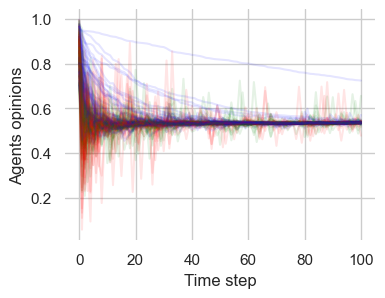

In [48]:
# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
       
for i in range(num_agents):
    if list(exp1_agents.query(f"AgentID == {i} and Step == 0")['opinion'])[0] > 0.7:
        if list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] > 0.7:
            c = 'red'
        elif list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] < 0.3:
            c = 'blue'
        else:
            c = 'green'
        sns.lineplot(x = "Step", y = "opinion", data = exp1_agents.query(f"AgentID == {i}"), color = c , alpha = 0.1)

plt.xlabel("Time step")
plt.ylabel("Agents opinions")

plt.show()

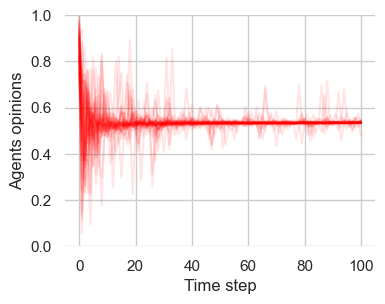

In [49]:
# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
       
for i in range(num_agents):
    if list(exp1_agents.query(f"AgentID == {i} and Step == 0")['opinion'])[0] > 0.7:
        if list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] > 0.7:
            c = 'red'
#         elif list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] < 0.3:
#             c = 'blue'
#         else:
#             c = 'green'
            sns.lineplot(x = "Step", y = "opinion", data = exp1_agents.query(f"AgentID == {i}"), color = c , alpha = 0.1)

plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")

plt.show()

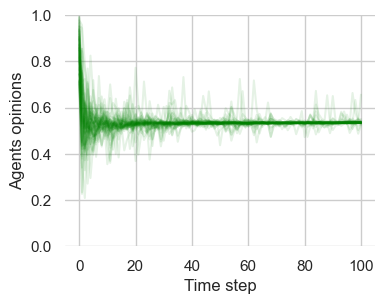

In [50]:
# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
       
for i in range(num_agents):
    if list(exp1_agents.query(f"AgentID == {i} and Step == 0")['opinion'])[0] > 0.7:
#         if list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] > 0.7:
#             c = 'red'
#         elif list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] < 0.3:
#             c = 'blue'
        if list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] <= 0.7 and list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] >= 0.3:
            c = 'green'
            sns.lineplot(x = "Step", y = "opinion", data = exp1_agents.query(f"AgentID == {i}"), color = c , alpha = 0.1)

plt.ylim(0,1)

plt.xlabel("Time step")
plt.ylabel("Agents opinions")

plt.show()

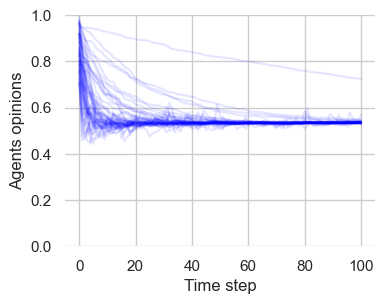

In [51]:
# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
       
for i in range(num_agents):
    if list(exp1_agents.query(f"AgentID == {i} and Step == 0")['opinion'])[0] > 0.7:
#         if list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] > 0.7:
#             c = 'red'
        if list(exp1_agents.query(f"AgentID == {i}")['peer_trust'])[0] < 0.3:
            c = 'blue'
#         else:
#             c = 'green'
            sns.lineplot(x = "Step", y = "opinion", data = exp1_agents.query(f"AgentID == {i}"), color = c , alpha = 0.1)

plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")

plt.show()

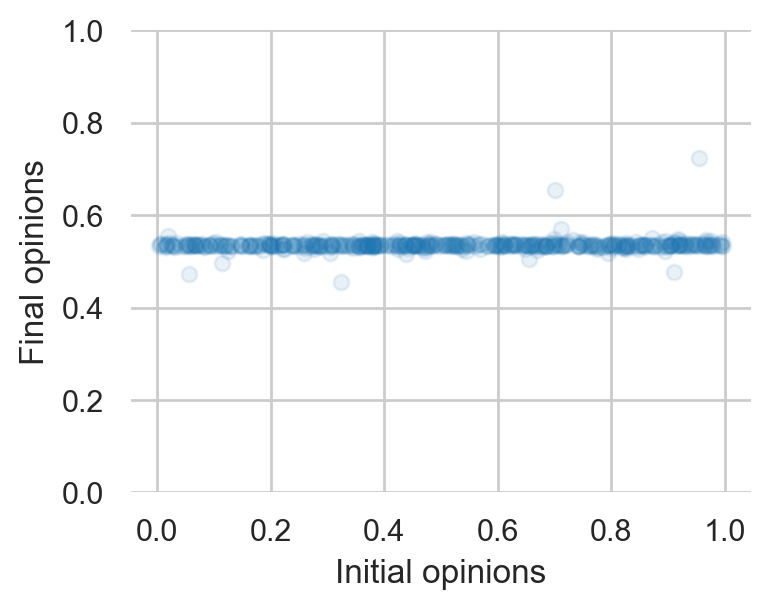

In [20]:

## final opinions of 500 agents as function of initial opinions ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

    
# needed data
last_step = exp1_agents['Step'].tail(1).values[0]

initial_op = list(exp1_agents.query("Step == 0")['opinion'])
final_op = list(exp1_agents.query("Step == @last_step")['opinion'])

# plotting 
# plt.scatter(x = initial_op, y = final_op, marker='o', s = 20, alpha = 0.1, facecolor='none', edgecolor="red")
plt.scatter(x = initial_op, y = final_op, marker='o', s = 30, alpha = 0.1 , color = "tab:blue")

plt.xlabel('Initial opinions')
plt.ylabel('Final opinions')
# plt.xlim(0,1)
plt.ylim(0,1)


plt.show()

## Batch Run

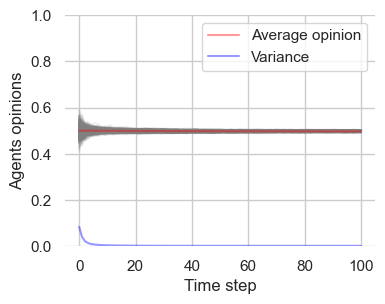

In [38]:
# num_agents = len(exp1_batch['AgentID'].unique())


# # figure format 
# plt.figure(figsize=(4,  3))

# for pos in ['right', 'top', 'bottom', 'left']: 
#     plt.gca().spines[pos].set_visible(False) 
    
# # plotting
# for i in range(num_agents):
#     # sns.lineplot(x = "Step", y = "opinion", data = exp1_agents.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)
#     sns.lineplot(x="Step", y="opinion", data=exp1_batch.query(f"AgentID == {i}").groupby("Step")["opinion"].mean().reset_index(), color = 'grey', alpha = 0.1)
    
# sns.lineplot(x="Step", y="opinion", data=exp1_batch.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp1_batch.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)

# plt.ylim(0,1)
# plt.xlabel("Time step")
# plt.ylabel("Agents opinions")


# plt.show()

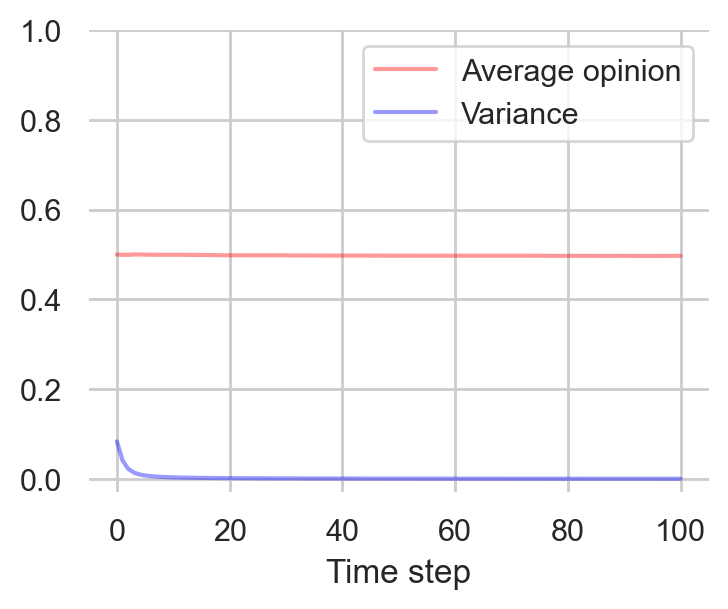

In [21]:
num_agents = len(exp1_batch['AgentID'].unique())


# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
# needed data
aggregated_results = exp1_batch.groupby(['iteration', 'Step'])['opinion'].agg(['mean', 'var']).reset_index()
    
# plotting    
sns.lineplot(data=aggregated_results.groupby("Step")['mean'].mean(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(data=aggregated_results.groupby("Step")['var'].mean(), label = "Variance", color = 'blue', alpha = 0.4)

plt.ylim(-0.03,1)
plt.xlabel("Time step")
plt.ylabel("")


plt.show()

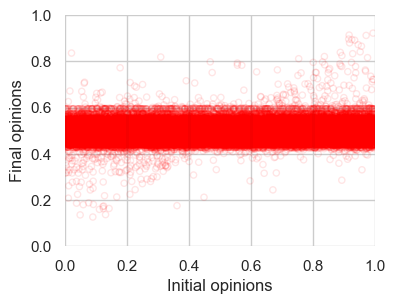

In [57]:
# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

    
# needed data
last_step = exp1_batch['Step'].tail(1).values[0]

initial_op = list(exp1_batch.query("Step == 0")['opinion'])
final_op = list(exp1_batch.query("Step == @last_step")['opinion'])

# plotting 
plt.scatter(x = initial_op, y = final_op, marker='o', s = 20, alpha = 0.1, facecolor='none', edgecolor="red")

plt.xlabel('Initial opinions')
plt.ylabel('Final opinions')
plt.xlim(0,1)
plt.ylim(0,1)


plt.show()

## Exp 2. tendency to share

In [23]:
exp2_agents = pd.read_csv(results_folder+"/exp2_p_b_agent_data.csv")
num_agents = len(exp2_agents['AgentID'].unique())

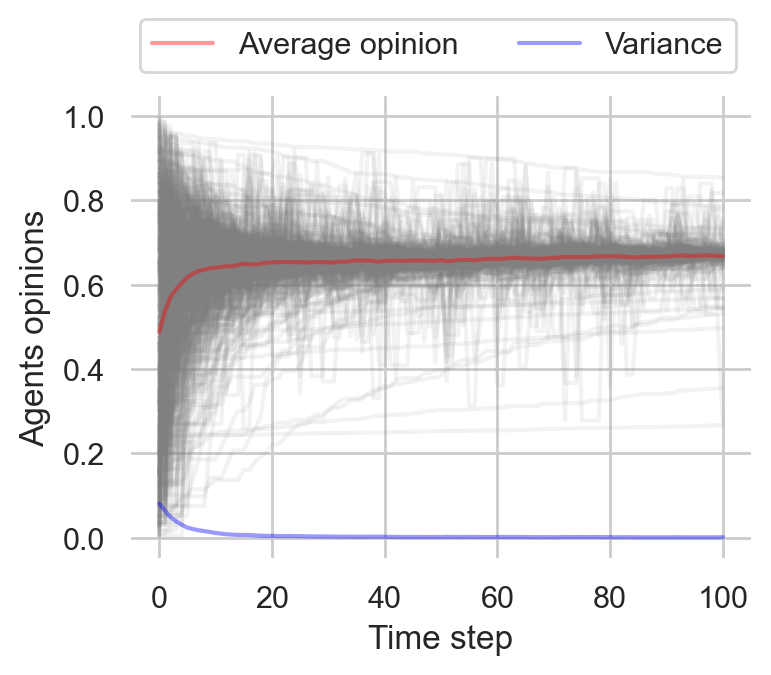

In [24]:
## opinions dynamics of 500 agents over 20 steps ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
    
# needed data
# sub_data = baseline_agents.query("Step < 21")

# plotting
for i in range(num_agents):
    sns.lineplot(x = "Step", y = "opinion", data = exp2_agents.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)

sns.lineplot(x="Step", y="opinion", data=exp2_agents.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(x="Step", y="opinion", data=exp2_agents.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp2_agents.groupby("Step")["opinion"].std().reset_index() , label = "std" , color = 'green', alpha = 0.4)


# plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")


plt.legend(bbox_to_anchor =(1, 1.2), ncol = 2)



plt.show()

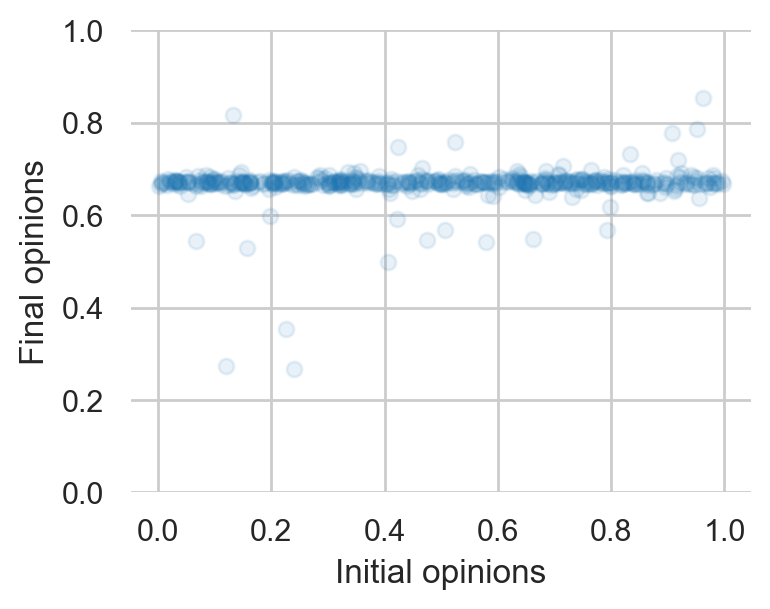

In [26]:
## final opinions of 500 agents as function of initial opinions ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

    
# needed data
last_step = exp2_agents['Step'].tail(1).values[0]

initial_op = list(exp2_agents.query("Step == 0")['opinion'])
final_op = list(exp2_agents.query("Step == @last_step")['opinion'])

# plotting 
# plt.scatter(x = initial_op, y = final_op, marker='o', s = 20, alpha = 0.1, facecolor='none', edgecolor="red")
plt.scatter(x = initial_op, y = final_op, marker='o', s = 30, alpha = 0.1, color = "tab:blue")

plt.xlabel('Initial opinions')
plt.ylabel('Final opinions')
# plt.xlim(0,1)
plt.ylim(0,1)


plt.show()


## Batch Run


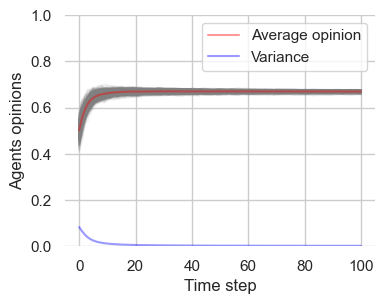

In [39]:
# num_agents = len(exp2_batch['AgentID'].unique())


# # figure format 
# plt.figure(figsize=(4,  3))

# for pos in ['right', 'top', 'bottom', 'left']: 
#     plt.gca().spines[pos].set_visible(False) 
    
# # plotting
# for i in range(num_agents):
#     # sns.lineplot(x = "Step", y = "opinion", data = exp1_agents.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)
#     sns.lineplot(x="Step", y="opinion", data=exp2_batch.query(f"AgentID == {i}").groupby("Step")["opinion"].mean().reset_index(), color = 'grey', alpha = 0.1)
    
# sns.lineplot(x="Step", y="opinion", data=exp2_batch.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp2_batch.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)

# plt.ylim(0,1)
# plt.xlabel("Time step")
# plt.ylabel("Agents opinions")


# plt.show()

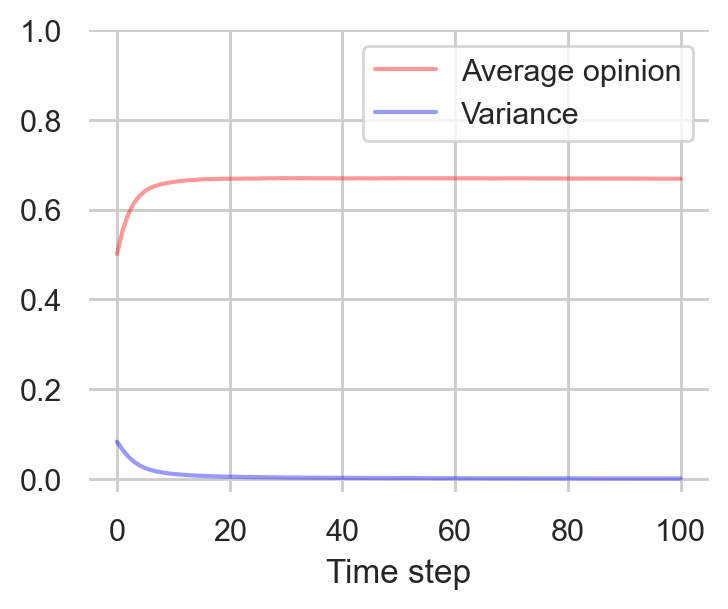

In [27]:
num_agents = len(exp2_batch['AgentID'].unique())


# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
# needed data
aggregated_results = exp2_batch.groupby(['iteration', 'Step'])['opinion'].agg(['mean', 'var']).reset_index()
    
# plotting    
sns.lineplot(data=aggregated_results.groupby("Step")['mean'].mean(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(data=aggregated_results.groupby("Step")['var'].mean(), label = "Variance", color = 'blue', alpha = 0.4)

plt.ylim(-0.03,1)
plt.xlabel("Time step")
plt.ylabel("")

# plt.legend(bbox_to_anchor =(1, 1.2), ncol = 2)

plt.show()

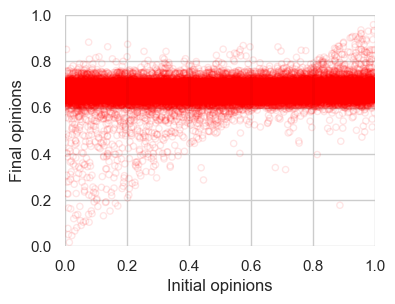

In [58]:
# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

    
# needed data
last_step = exp2_batch['Step'].tail(1).values[0]

initial_op = list(exp2_batch.query("Step == 0")['opinion'])
final_op = list(exp2_batch.query("Step == @last_step")['opinion'])

# plotting 
plt.scatter(x = initial_op, y = final_op, marker='o', s = 20, alpha = 0.1, facecolor='none', edgecolor="red")

plt.xlabel('Initial opinions')
plt.ylabel('Final opinions')
plt.xlim(0,1)
plt.ylim(0,1)


plt.show()

## Exp 3 and 4. risk sensitivity

In [28]:
exp3_agents = pd.read_csv(results_folder+"/exp3_p_r_agent_data.csv")
num_agents = len(exp3_agents['AgentID'].unique())


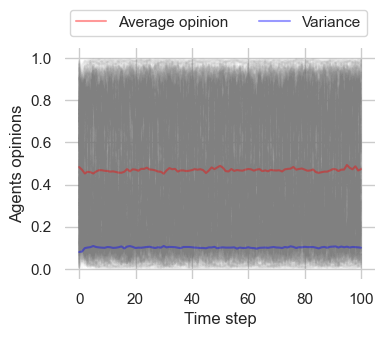

In [43]:
## opinions dynamics of 500 agents over 20 steps ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
    
# needed data
# sub_data = baseline_agents.query("Step < 21")

# plotting
for i in range(num_agents):
    c = "grey"
    sns.lineplot(x = "Step", y = "opinion", data = exp3_agents.query(f"AgentID == {i}"), color = c, alpha = 0.05)

temp_data = exp3_agents.query('risk_sensitivity == 2')
sns.lineplot(x="Step", y="opinion", data=exp3_agents.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(x="Step", y="opinion", data=exp3_agents.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)

plt.legend(bbox_to_anchor =(1, 1.2), ncol = 2)


# plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")



plt.show()

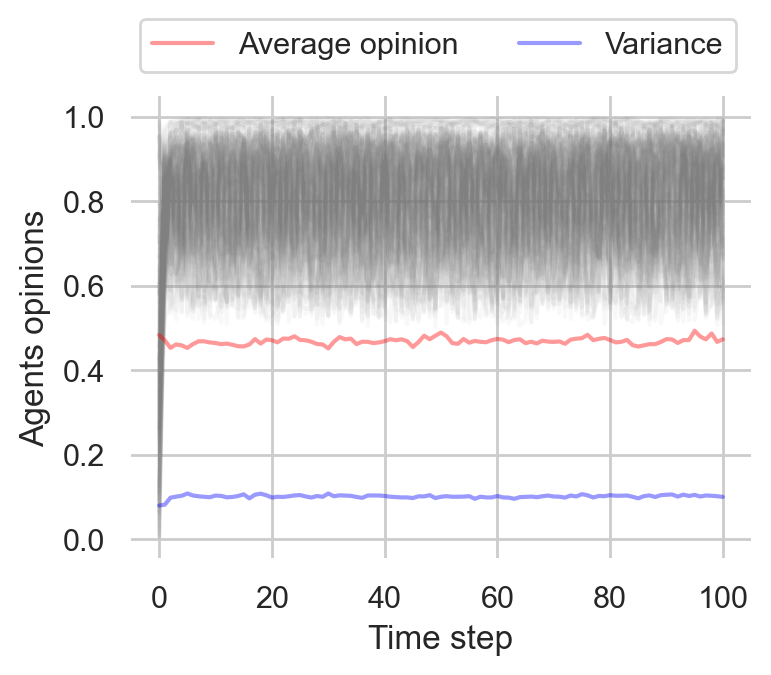

In [29]:
## opinions dynamics of 500 agents over 20 steps ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
    
# needed data
# sub_data = baseline_agents.query("Step < 21")

# plotting
for i in range(num_agents):
    if list(exp3_agents.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
#         c = 'red'
        c = "grey"
        sns.lineplot(x = "Step", y = "opinion", data = exp3_agents.query(f"AgentID == {i}"), color = c, alpha = 0.05)

temp_data = exp3_agents.query('risk_sensitivity == 2')
sns.lineplot(x="Step", y="opinion", data=exp3_agents.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(x="Step", y="opinion", data=exp3_agents.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp3_agents.groupby("Step")["opinion"].std().reset_index() , label = "std" , color = 'green', alpha = 0.4)

plt.legend(bbox_to_anchor =(1, 1.2), ncol = 2)


# plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")



plt.show()

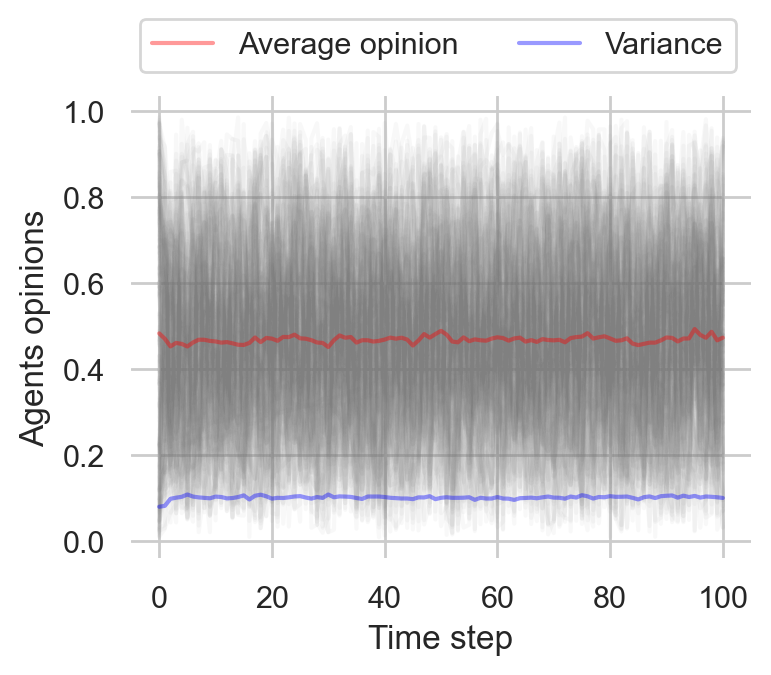

In [30]:
## opinions dynamics of 500 agents over 20 steps ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
    
# needed data
# sub_data = baseline_agents.query("Step < 21")

# plotting
for i in range(num_agents):
    if list(exp3_agents.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
 #         c = 'red'
        c = "grey"
        sns.lineplot(x = "Step", y = "opinion", data = exp3_agents.query(f"AgentID == {i}"), color = c, alpha = 0.05)

temp_data = exp3_agents.query('risk_sensitivity == 1')
sns.lineplot(x="Step", y="opinion", data=exp3_agents.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(x="Step", y="opinion", data=exp3_agents.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp3_agents.groupby("Step")["opinion"].std().reset_index() , label = "std" , color = 'green', alpha = 0.4)

plt.legend(bbox_to_anchor =(1, 1.2), ncol = 2)
# plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")


plt.show()

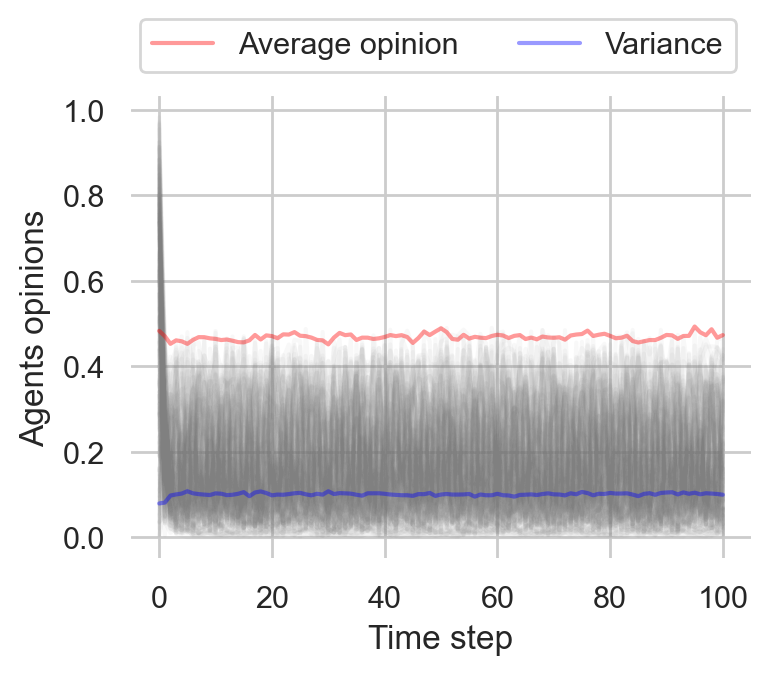

In [31]:
## opinions dynamics of 500 agents over 20 steps ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
    
# needed data
# sub_data = baseline_agents.query("Step < 21")

# plotting
for i in range(num_agents):
    if list(exp3_agents.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
  #         c = 'red'
        c = "grey"
        sns.lineplot(x = "Step", y = "opinion", data = exp3_agents.query(f"AgentID == {i}"), color = c, alpha = 0.05)

temp_data = exp3_agents.query('risk_sensitivity == 0')
sns.lineplot(x="Step", y="opinion", data=exp3_agents.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(x="Step", y="opinion", data=exp3_agents.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp3_agents.groupby("Step")["opinion"].std().reset_index() , label = "std" , color = 'green', alpha = 0.4)

plt.legend(bbox_to_anchor =(1, 1.2), ncol = 2)
# plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")


plt.show()

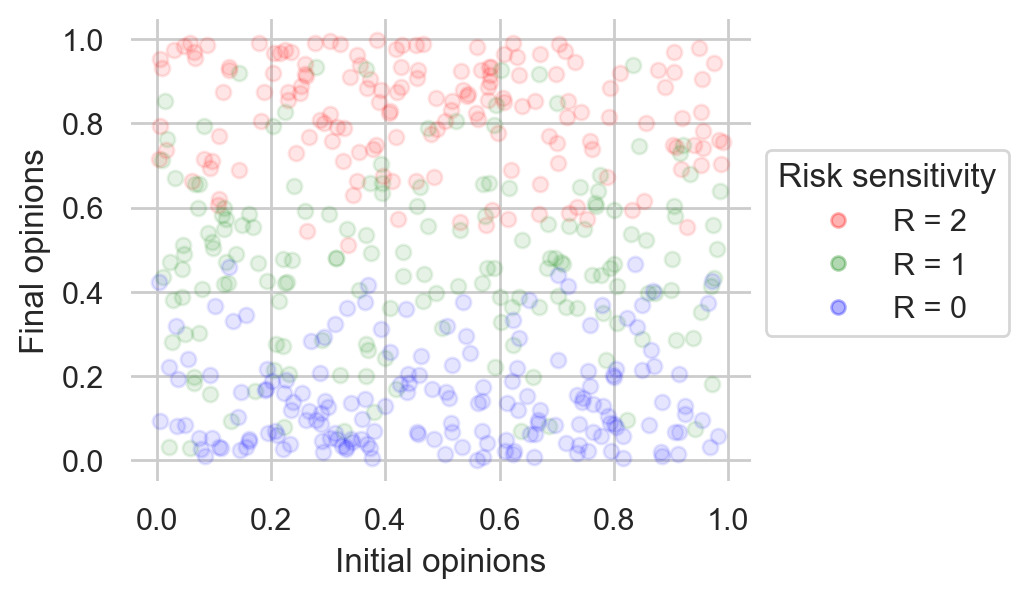

In [32]:
## final opinions of 500 agents as function of initial opinions ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

    
# plotting
last_step = exp3_agents['Step'].tail(1).values[0]

initial_op = list(exp3_agents.query("Step == 0 and risk_sensitivity == 2")['opinion'])
final_op = list(exp3_agents.query("Step == @last_step and risk_sensitivity == 2")['opinion'])
# plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 2 ", s = 20, alpha = 0.3, facecolor='none', edgecolor="red")
plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 2 ", s = 30, alpha = 0.1, color="red")

initial_op = list(exp3_agents.query("Step == 0 and risk_sensitivity == 1")['opinion'])
final_op = list(exp3_agents.query("Step == @last_step and risk_sensitivity == 1")['opinion'])
# plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 1 ", s = 20, alpha = 0.3, facecolor='none', edgecolor="green")
plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 1 ", s = 30, alpha = 0.1, color="green")

initial_op = list(exp3_agents.query("Step == 0 and risk_sensitivity == 0")['opinion'])
final_op = list(exp3_agents.query("Step == @last_step and risk_sensitivity == 0")['opinion'])
# plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 0 ", s = 20, alpha = 0.3, facecolor='none', edgecolor="blue")
plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 0 ", s = 30, alpha = 0.1, color="blue")


plt.xlabel('Initial opinions')
plt.ylabel('Final opinions')
# plt.xlim(0,1)
# plt.ylim(0,1)



# Create custom legend handles with higher opacity
handles = [plt.Line2D([], [], marker='o', markersize=5, color='red', linestyle='None', alpha=0.3),
           plt.Line2D([], [], marker='o', markersize=5, color='green', linestyle='None', alpha=0.3),
           plt.Line2D([], [], marker='o', markersize=5, color='blue', linestyle='None', alpha=0.3)]

# Plot legend with custom handles and labels
plt.legend(handles, ['R = 2', 'R = 1', 'R = 0'], bbox_to_anchor=(1, 0.75), ncol=1, title="Risk sensitivity")


# plt.legend(bbox_to_anchor=(1, 0.75), ncol=1, title="Risk sensitivity")

plt.show()

In [89]:
# exp4_agents = pd.read_csv(results_folder+"/exp4_r_p_agent_data.csv")
# num_agents = len(exp4_agents['AgentID'].unique())

In [158]:
# ## opinions dynamics of 500 agents over 20 steps ##

# # figure format 
# plt.figure(figsize=(4,  3))

# for pos in ['right', 'top', 'bottom', 'left']: 
#     plt.gca().spines[pos].set_visible(False) 
    
    
# # needed data
# # sub_data = baseline_agents.query("Step < 21")

# # plotting
# for i in range(num_agents):
#     if list(exp4_agents.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
#         c = 'red'
#         sns.lineplot(x = "Step", y = "opinion", data = exp4_agents.query(f"AgentID == {i}"), color = c, alpha = 0.1)

# # plt.ylim(0,1)
# plt.xlabel("Time step")
# plt.ylabel("Agents opinions")


# plt.show()

In [159]:
# ## opinions dynamics of 500 agents over 20 steps ##

# # figure format 
# plt.figure(figsize=(4,  3))

# for pos in ['right', 'top', 'bottom', 'left']: 
#     plt.gca().spines[pos].set_visible(False) 
    
    
# # needed data
# # sub_data = baseline_agents.query("Step < 21")

# # plotting
# for i in range(num_agents):
#     if list(exp4_agents.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
#         c = 'green'
#         sns.lineplot(x = "Step", y = "opinion", data = exp4_agents.query(f"AgentID == {i}"), color = c, alpha = 0.1)

# # plt.ylim(0,1)
# plt.xlabel("Time step")
# plt.ylabel("Agents opinions")


# plt.show()

In [160]:
# ## opinions dynamics of 500 agents over 20 steps ##

# # figure format 
# plt.figure(figsize=(4,  3))

# for pos in ['right', 'top', 'bottom', 'left']: 
#     plt.gca().spines[pos].set_visible(False) 
    
    
# # needed data
# # sub_data = baseline_agents.query("Step < 21")

# # plotting
# for i in range(num_agents):
#     if list(exp4_agents.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
#         c = 'blue'
#         sns.lineplot(x = "Step", y = "opinion", data = exp4_agents.query(f"AgentID == {i}"), color = c, alpha = 0.1)

# # plt.ylim(0,1)
# plt.xlabel("Time step")
# plt.ylabel("Agents opinions")


# plt.show()

In [161]:
# ## final opinions of 500 agents as function of initial opinions ##

# # figure format 
# plt.figure(figsize=(4,  3))

# for pos in ['right', 'top', 'bottom', 'left']: 
#     plt.gca().spines[pos].set_visible(False) 

    
# # needed data
# last_step = exp4_agents['Step'].tail(1).values[0]

# initial_op = list(exp4_agents.query("Step == 0")['opinion'])
# final_op = list(exp4_agents.query("Step == @last_step")['opinion'])

# # plotting 
# plt.scatter(x = initial_op, y = final_op, marker='o', s = 20, alpha = 0.1, facecolor='none', edgecolor="red")

# plt.xlabel('Initial opinions')
# plt.ylabel('Final opinions')
# plt.xlim(0,1)
# plt.ylim(0,1)


# plt.show()

## Batch run

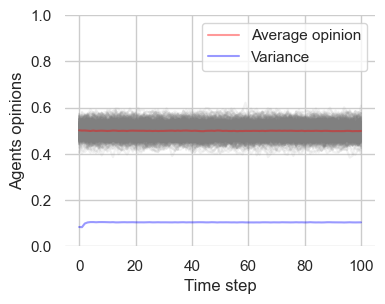

In [41]:
# num_agents = len(exp3_batch['AgentID'].unique())


# # figure format 
# plt.figure(figsize=(4,  3))

# for pos in ['right', 'top', 'bottom', 'left']: 
#     plt.gca().spines[pos].set_visible(False) 
    
# # plotting
# for i in range(num_agents):
#     # sns.lineplot(x = "Step", y = "opinion", data = exp1_agents.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)
#     sns.lineplot(x="Step", y="opinion", data=exp3_batch.query(f"AgentID == {i}").groupby("Step")["opinion"].mean().reset_index(), color = 'grey', alpha = 0.1)
    
# sns.lineplot(x="Step", y="opinion", data=exp3_batch.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp3_batch.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)

# plt.ylim(0,1)
# plt.xlabel("Time step")
# plt.ylabel("Agents opinions")


# plt.show()

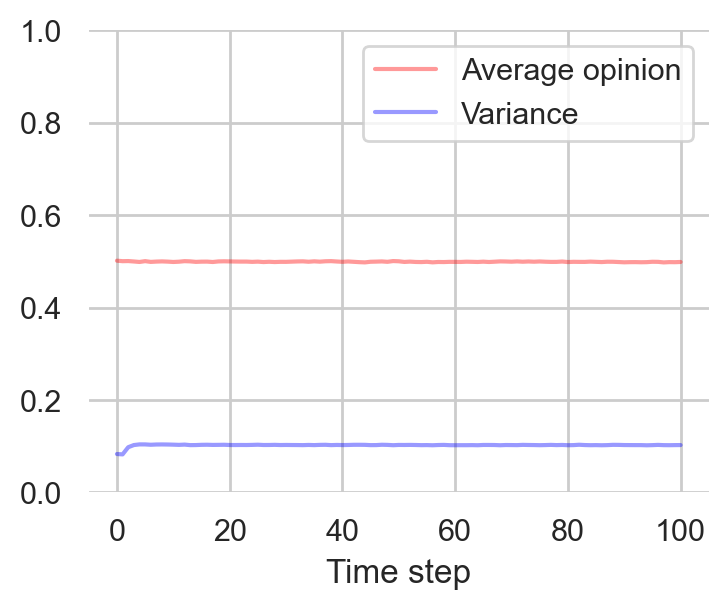

In [33]:
num_agents = len(exp3_batch['AgentID'].unique())


# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
# needed data
aggregated_results = exp3_batch.groupby(['iteration', 'Step'])['opinion'].agg(['mean', 'var']).reset_index()
    
# plotting    
sns.lineplot(data=aggregated_results.groupby("Step")['mean'].mean(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(data=aggregated_results.groupby("Step")['var'].mean(), label = "Variance", color = 'blue', alpha = 0.4)

plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("")


plt.show()

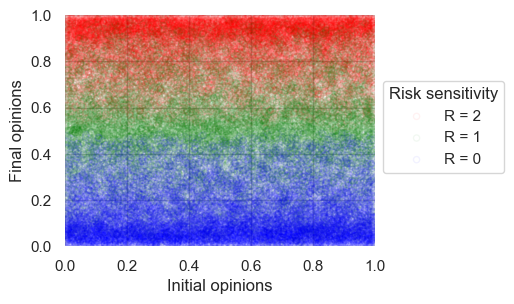

In [64]:
# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

    
# plotting
last_step = exp3_batch['Step'].tail(1).values[0]

initial_op = list(exp3_batch.query("Step == 0 and risk_sensitivity == 2")['opinion'])
final_op = list(exp3_batch.query("Step == @last_step and risk_sensitivity == 2")['opinion'])
plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 2 ", s = 20, alpha = 0.05, facecolor='none', edgecolor="red")

initial_op = list(exp3_batch.query("Step == 0 and risk_sensitivity == 1")['opinion'])
final_op = list(exp3_batch.query("Step == @last_step and risk_sensitivity == 1")['opinion'])
plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 1 ", s = 20, alpha = 0.05, facecolor='none', edgecolor="green")

initial_op = list(exp3_batch.query("Step == 0 and risk_sensitivity == 0")['opinion'])
final_op = list(exp3_batch.query("Step == @last_step and risk_sensitivity == 0")['opinion'])
plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 0 ", s = 20, alpha = 0.05, facecolor='none', edgecolor="blue")


plt.xlabel('Initial opinions')
plt.ylabel('Final opinions')
plt.xlim(0,1)
plt.ylim(0,1)

plt.legend(bbox_to_anchor=(1, 0.75), ncol=1, title="Risk sensitivity")

plt.show()

## Exp 5. all attributes

In [34]:
exp5_agents = pd.read_csv(results_folder+"/exp5_all_agent_data.csv")
num_agents = len(exp5_agents['AgentID'].unique())

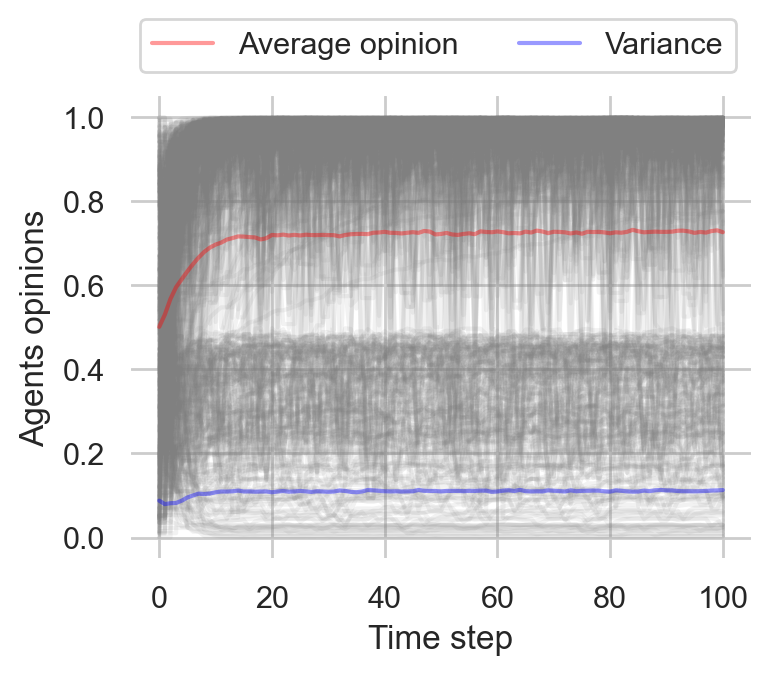

In [35]:
## opinions dynamics of 500 agents over 20 steps ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
    
# needed data
# sub_data = baseline_agents.query("Step < 21")

# plotting
for i in range(num_agents):
    sns.lineplot(x = "Step", y = "opinion", data = exp5_agents.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)

# for i in range(num_agents):
#     if list(exp5_agents.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
# #         c = 'red'
#         c = "grey"
#         sns.lineplot(x = "Step", y = "opinion", data = exp5_agents.query(f"AgentID == {i}"), color = c, alpha = 0.05)

# temp_data = exp5_agents.query('risk_sensitivity == 2')
sns.lineplot(x="Step", y="opinion", data=exp5_agents.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(x="Step", y="opinion", data=exp5_agents.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp5_agents.groupby("Step")["opinion"].std().reset_index() , label = "std" , color = 'green', alpha = 0.4)

plt.legend(bbox_to_anchor =(1, 1.2), ncol = 2)

# plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")


plt.show()

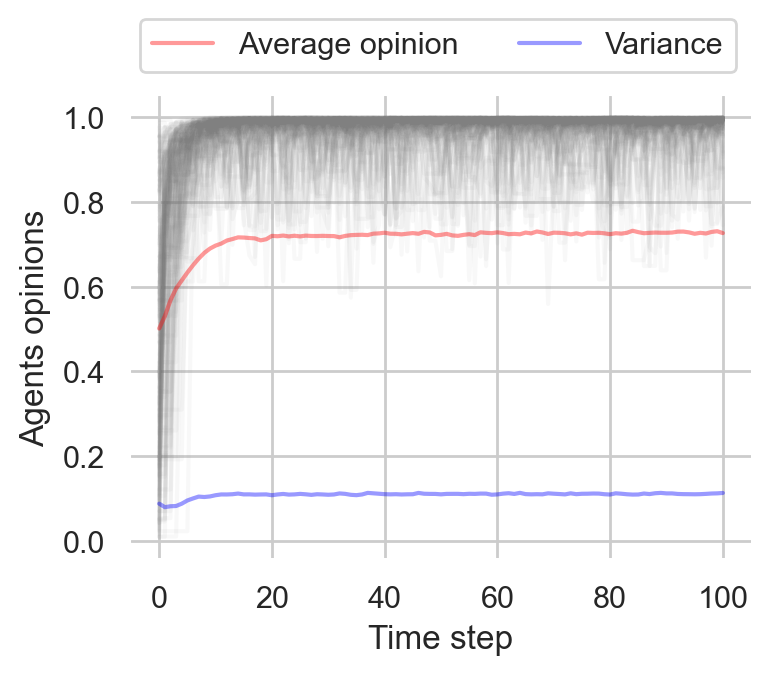

In [36]:
## opinions dynamics of 500 agents over 20 steps ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
    
# needed data
# sub_data = baseline_agents.query("Step < 21")

# plotting
# for i in range(num_agents):
#     sns.lineplot(x = "Step", y = "opinion", data = exp5_agents.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)

for i in range(num_agents):
    if list(exp5_agents.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
#         c = 'red'
        c = "grey"
        sns.lineplot(x = "Step", y = "opinion", data = exp5_agents.query(f"AgentID == {i}"), color = c, alpha = 0.05)

temp_data = exp5_agents.query('risk_sensitivity == 2')
sns.lineplot(x="Step", y="opinion", data=exp5_agents.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(x="Step", y="opinion", data=exp5_agents.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp5_agents.groupby("Step")["opinion"].std().reset_index() , label = "std" , color = 'green', alpha = 0.4)

plt.legend(bbox_to_anchor =(1, 1.2), ncol = 2)

# plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")


plt.show()

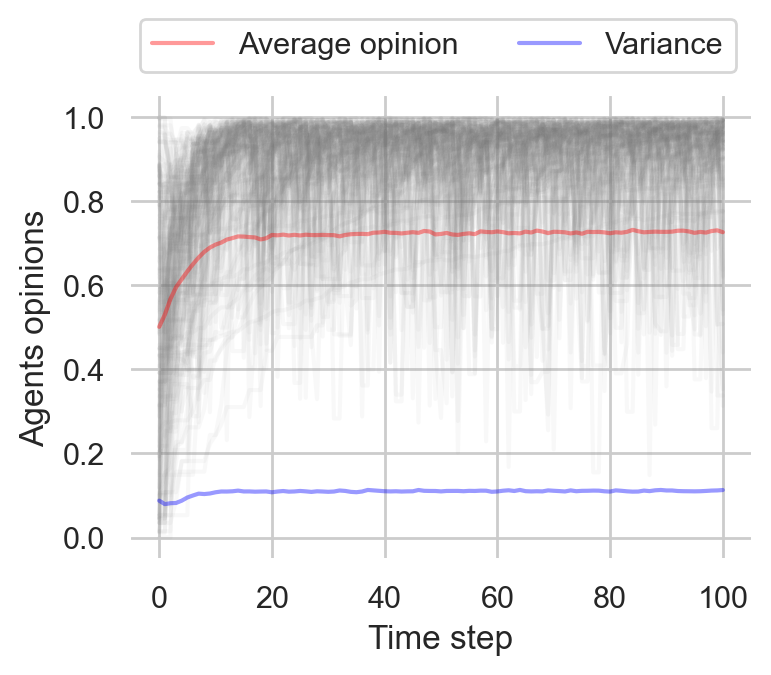

In [37]:
## opinions dynamics of 500 agents over 20 steps ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
    
# needed data
# sub_data = baseline_agents.query("Step < 21")

# plotting
# for i in range(num_agents):
#     sns.lineplot(x = "Step", y = "opinion", data = exp5_agents.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)

for i in range(num_agents):
    if list(exp5_agents.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
  #         c = 'red'
        c = "grey"
        sns.lineplot(x = "Step", y = "opinion", data = exp5_agents.query(f"AgentID == {i}"), color = c, alpha = 0.05)

temp_data = exp5_agents.query('risk_sensitivity == 1')
sns.lineplot(x="Step", y="opinion", data=exp5_agents.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(x="Step", y="opinion", data=exp5_agents.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp5_agents.groupby("Step")["opinion"].std().reset_index() , label = "std" , color = 'green', alpha = 0.4)

plt.legend(bbox_to_anchor =(1, 1.2), ncol = 2)
# plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")


plt.show()

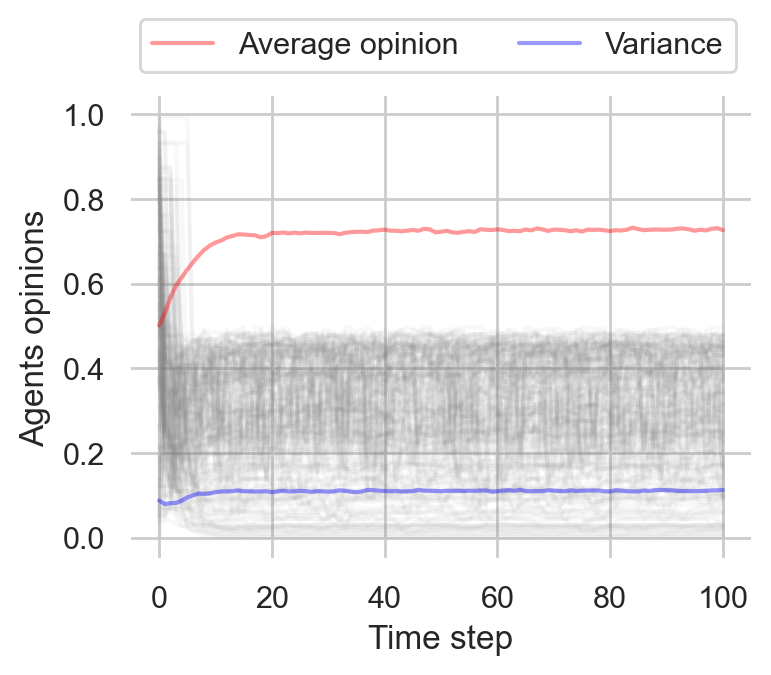

In [38]:
## opinions dynamics of 500 agents over 20 steps ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
    
# needed data
# sub_data = baseline_agents.query("Step < 21")

# plotting
# for i in range(num_agents):
#     sns.lineplot(x = "Step", y = "opinion", data = exp5_agents.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)

for i in range(num_agents):
    if list(exp5_agents.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        #         c = 'red'
        c = "grey"
        sns.lineplot(x = "Step", y = "opinion", data = exp5_agents.query(f"AgentID == {i}"), color = c, alpha = 0.05)

temp_data = exp5_agents.query('risk_sensitivity == 0')
sns.lineplot(x="Step", y="opinion", data=exp5_agents.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(x="Step", y="opinion", data=exp5_agents.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp5_agents.groupby("Step")["opinion"].std().reset_index() , label = "std" , color = 'green', alpha = 0.4)

plt.legend(bbox_to_anchor =(1, 1.2), ncol = 2)
# plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Agents opinions")


plt.show()

In [164]:
# ## final opinions of 500 agents as function of initial opinions ##

# # figure format 
# plt.figure(figsize=(4,  3))

# for pos in ['right', 'top', 'bottom', 'left']: 
#     plt.gca().spines[pos].set_visible(False) 

    
# # needed data
# last_step = exp5_agents['Step'].tail(1).values[0]

# initial_op = list(exp5_agents.query("Step == 0")['opinion'])
# final_op = list(exp5_agents.query("Step == @last_step")['opinion'])

# # plotting 
# plt.scatter(x = initial_op, y = final_op, marker='o', s = 20, alpha = 0.1, facecolor='none', edgecolor="red")

# plt.xlabel('Initial opinions')
# plt.ylabel('Final opinions')
# plt.xlim(0,1)
# plt.ylim(0,1)


# plt.show()

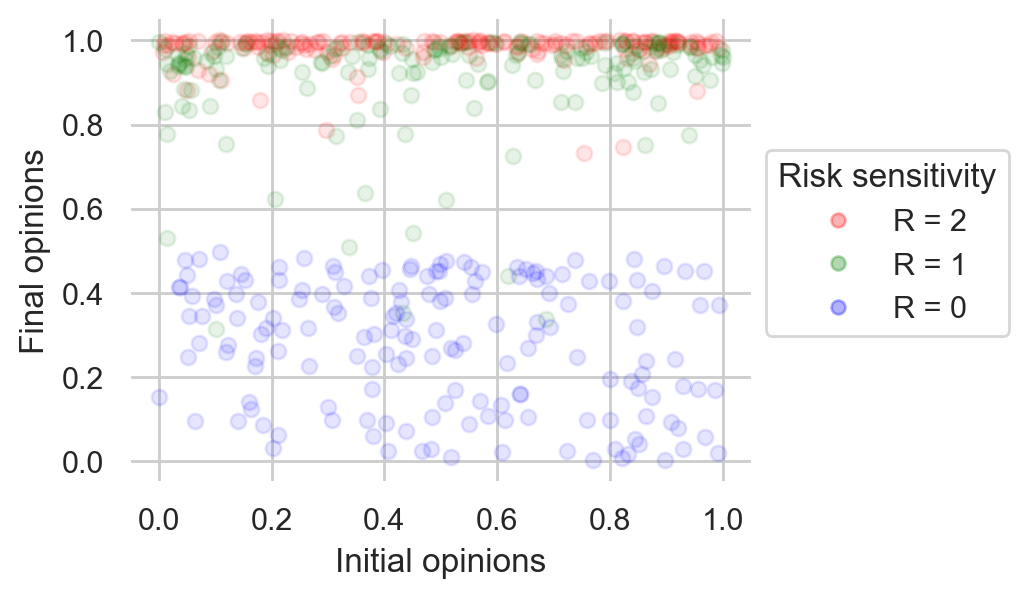

In [39]:
## final opinions of 500 agents as function of initial opinions ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

    
# plotting
last_step = exp5_agents['Step'].tail(1).values[0]

initial_op = list(exp5_agents.query("Step == 0 and risk_sensitivity == 2")['opinion'])
final_op = list(exp5_agents.query("Step == @last_step and risk_sensitivity == 2")['opinion'])
# plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 2 ", s = 20, alpha = 0.3, facecolor='none', edgecolor="red")
plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 2 ", s = 30, alpha = 0.1, color="red")

initial_op = list(exp5_agents.query("Step == 0 and risk_sensitivity == 1")['opinion'])
final_op = list(exp5_agents.query("Step == @last_step and risk_sensitivity == 1")['opinion'])
# plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 1 ", s = 20, alpha = 0.3, facecolor='none', edgecolor="green")
plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 1 ", s = 30, alpha = 0.1, color="green")

initial_op = list(exp5_agents.query("Step == 0 and risk_sensitivity == 0")['opinion'])
final_op = list(exp5_agents.query("Step == @last_step and risk_sensitivity == 0")['opinion'])
# plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 0 ", s = 20, alpha = 0.3, facecolor='none', edgecolor="blue")
plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 0 ", s = 30, alpha = 0.1, color="blue")


plt.xlabel('Initial opinions')
plt.ylabel('Final opinions')
# plt.xlim(0,1)
# plt.ylim(0,1)


# Create custom legend handles with higher opacity
handles = [plt.Line2D([], [], marker='o', markersize=5, color='red', linestyle='None', alpha=0.3),
           plt.Line2D([], [], marker='o', markersize=5, color='green', linestyle='None', alpha=0.3),
           plt.Line2D([], [], marker='o', markersize=5, color='blue', linestyle='None', alpha=0.3)]

# Plot legend with custom handles and labels
plt.legend(handles, ['R = 2', 'R = 1', 'R = 0'], bbox_to_anchor=(1, 0.75), ncol=1, title="Risk sensitivity")

# plt.legend(bbox_to_anchor=(1, 0.75), ncol=1, title="Risk sensitivity")

plt.show()

## Batch Run

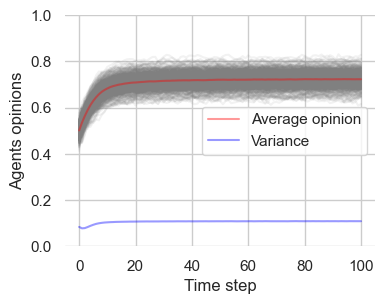

In [45]:
# num_agents = len(exp5_batch['AgentID'].unique())


# # figure format 
# plt.figure(figsize=(4,  3))

# for pos in ['right', 'top', 'bottom', 'left']: 
#     plt.gca().spines[pos].set_visible(False) 
    
# # plotting
# for i in range(num_agents):
#     # sns.lineplot(x = "Step", y = "opinion", data = exp1_agents.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)
#     sns.lineplot(x="Step", y="opinion", data=exp5_batch.query(f"AgentID == {i}").groupby("Step")["opinion"].mean().reset_index(), color = 'grey', alpha = 0.1)
    
# sns.lineplot(x="Step", y="opinion", data=exp5_batch.groupby("Step")["opinion"].mean().reset_index(), label = "Average opinion", color = 'red', alpha = 0.4)
# sns.lineplot(x="Step", y="opinion", data=exp5_batch.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)

# plt.ylim(0,1)
# plt.xlabel("Time step")
# plt.ylabel("Agents opinions")


# plt.show()

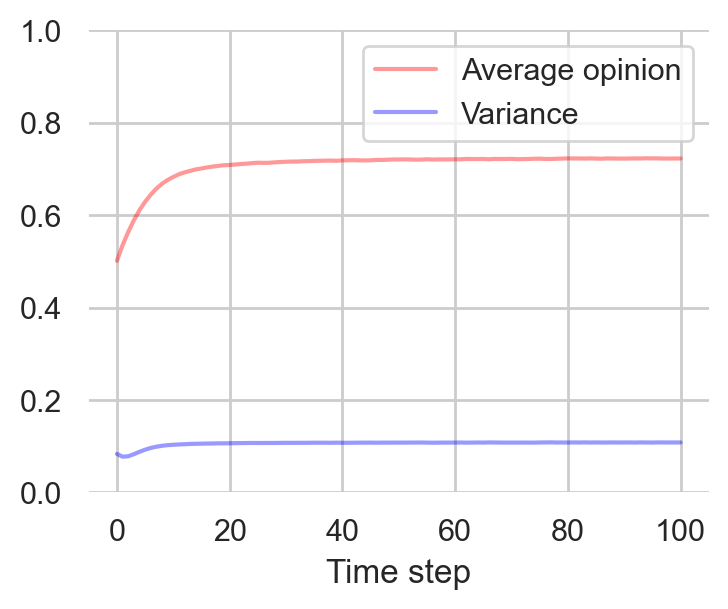

In [40]:
num_agents = len(exp5_batch['AgentID'].unique())


# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
# needed data
aggregated_results = exp5_batch.groupby(['iteration', 'Step'])['opinion'].agg(['mean', 'var']).reset_index()
    
# plotting    
sns.lineplot(data=aggregated_results.groupby("Step")['mean'].mean(), label = "Average opinion", color = 'red', alpha = 0.4)
sns.lineplot(data=aggregated_results.groupby("Step")['var'].mean(), label = "Variance", color = 'blue', alpha = 0.4)

plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("")


plt.show()

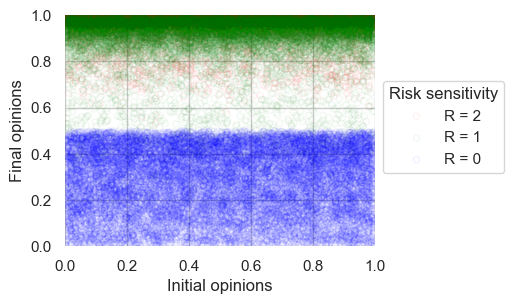

In [69]:
## final opinions of 500 agents as function of initial opinions ##

# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

    
# plotting
last_step = exp5_batch['Step'].tail(1).values[0]

initial_op = list(exp5_batch.query("Step == 0 and risk_sensitivity == 2")['opinion'])
final_op = list(exp5_batch.query("Step == @last_step and risk_sensitivity == 2")['opinion'])
plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 2 ", s = 20, alpha = 0.05, facecolor='none', edgecolor="red")

initial_op = list(exp5_batch.query("Step == 0 and risk_sensitivity == 1")['opinion'])
final_op = list(exp5_batch.query("Step == @last_step and risk_sensitivity == 1")['opinion'])
plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 1 ", s = 20, alpha = 0.05, facecolor='none', edgecolor="green")

initial_op = list(exp5_batch.query("Step == 0 and risk_sensitivity == 0")['opinion'])
final_op = list(exp5_batch.query("Step == @last_step and risk_sensitivity == 0")['opinion'])
plt.scatter(x = initial_op, y = final_op, marker='o', label = "R = 0 ", s = 20, alpha = 0.05, facecolor='none', edgecolor="blue")


plt.xlabel('Initial opinions')
plt.ylabel('Final opinions')
plt.xlim(0,1)
plt.ylim(0,1)

plt.legend(bbox_to_anchor=(1, 0.75), ncol=1, title="Risk sensitivity")

plt.show()

# Plot all experiments for comparision

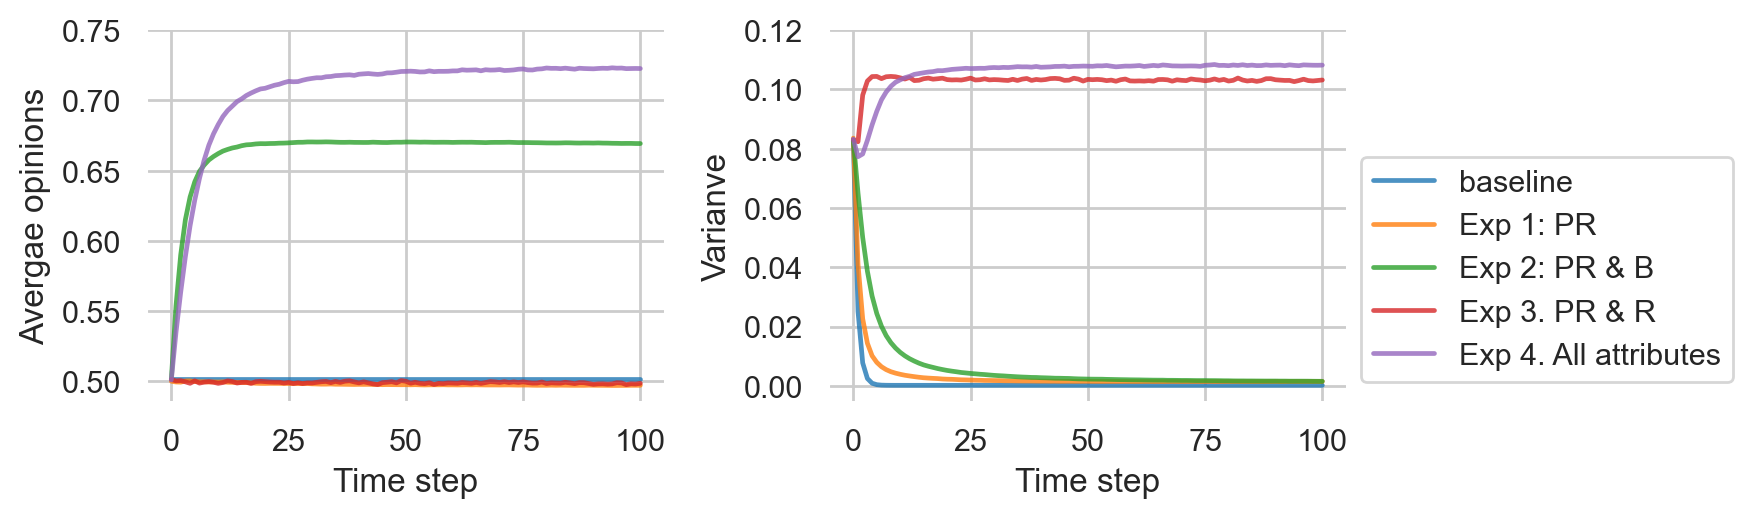

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(7,2.75))
    
colors = {0 : "tab:blue" , 1 : "tab:orange" , 2 : "tab:green" , 3 :"tab:red" , 4 : "tab:purple" }

axs[0].plot("Step", "opinion", data=baseline_batch.groupby("Step")["opinion"].mean().reset_index(), label = "baseline" , color = colors[0] , linewidth = 1.7, alpha = .8)
axs[0].plot("Step", "opinion", data=exp1_batch.groupby("Step")["opinion"].mean().reset_index(), label = "Exp 1: PR" , color = colors[1] , linewidth = 1.7, alpha = .8)
axs[0].plot("Step", "opinion", data=exp2_batch.groupby("Step")["opinion"].mean().reset_index(), label = "Exp 2: PR & B" , color = colors[2] , linewidth = 1.7, alpha = .8)
axs[0].plot("Step", "opinion", data=exp3_batch.groupby("Step")["opinion"].mean().reset_index(), label = "Exp 3. PR & R" , color = colors[3] , linewidth = 1.7, alpha = .8)
axs[0].plot("Step", "opinion", data=exp5_batch.groupby("Step")["opinion"].mean().reset_index(), label = "Exp 4. All attributes" , color = colors[4] , linewidth = 1.7, alpha = .8)
axs[0].set_xlabel("Time step")
axs[0].set_ylabel("Avergae opinions")
axs[0].set_yticks([0.5 , 0.55 , 0.6 , 0.65, 0.7, 0.75]) 


axs[1].plot("Step", "opinion", data=baseline_batch.groupby("Step")["opinion"].var().reset_index(), label = "baseline" , color = colors[0] , linewidth = 1.7, alpha = .8)
axs[1].plot("Step", "opinion", data=exp1_batch.groupby("Step")["opinion"].var().reset_index(), label = "Exp 1: PR" , color = colors[1] , linewidth = 1.7, alpha = .8)
axs[1].plot("Step", "opinion", data=exp2_batch.groupby("Step")["opinion"].var().reset_index(), label = "Exp 2: PR & B" , color = colors[2] , linewidth = 1.7, alpha = .8)
axs[1].plot("Step", "opinion", data=exp3_batch.groupby("Step")["opinion"].var().reset_index(), label = "Exp 3. PR & R" , color = colors[3] , linewidth = 1.7, alpha = .8)
axs[1].plot("Step", "opinion", data=exp5_batch.groupby("Step")["opinion"].var().reset_index(), label = "Exp 4. All attributes" , color = colors[4] , linewidth = 1.7, alpha = .8)
axs[1].set_xlabel("Time step")
axs[1].set_ylabel("Varianve")
axs[1].set_yticks([0 , 0.02,  0.04 , 0.06,  0.08, 0.1 , 0.12])


for i in [0,1]:
    for pos in ['right', 'top', 'bottom', 'left']: 
        axs[i].spines[pos].set_visible(False)

axs[1].legend(bbox_to_anchor=(1, 0.7), ncol=1)

plt.tight_layout()
plt.show()

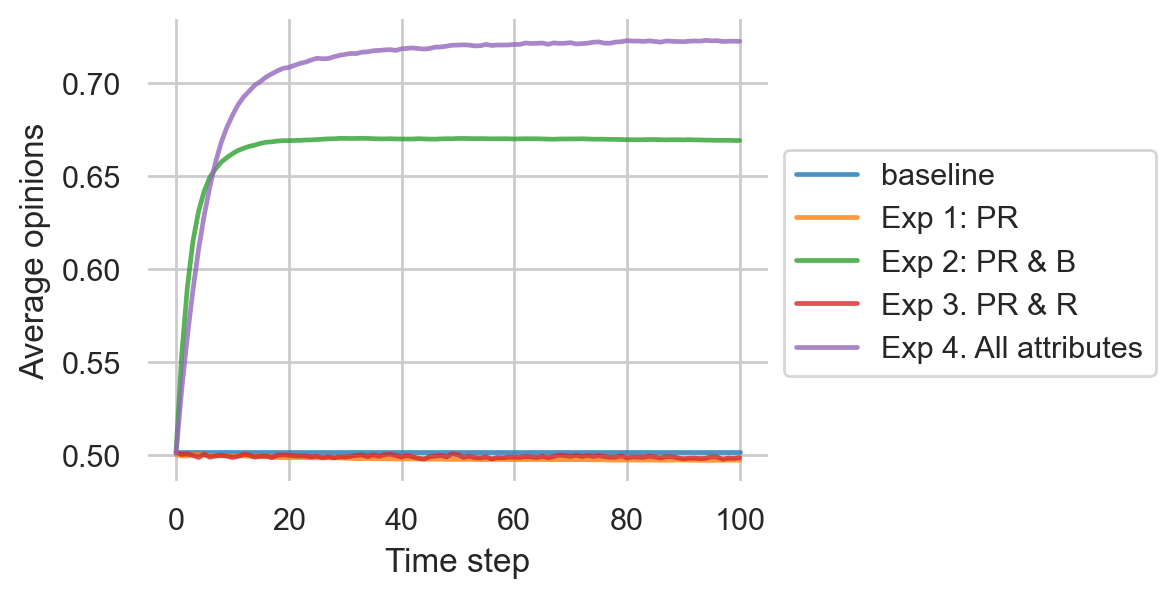

In [82]:
# num_agents = len(exp5_batch['AgentID'].unique())


# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

colors = {0 : "tab:blue" , 1 : "tab:orange" , 2 : "tab:green" , 3 : "tab:red" , 4 :"tab:purple" }

sns.lineplot(x="Step", y="opinion", data=baseline_batch.groupby("Step")["opinion"].mean().reset_index(), label = "baseline" , color = colors[0], linewidth = 1.7, alpha = .8)
sns.lineplot(x="Step", y="opinion", data=exp1_batch.groupby("Step")["opinion"].mean().reset_index(), label = "Exp 1: PR" , color = colors[1], linewidth = 1.7, alpha = .8)
sns.lineplot(x="Step", y="opinion", data=exp2_batch.groupby("Step")["opinion"].mean().reset_index(), label = "Exp 2: PR & B" , color = colors[2], linewidth = 1.7, alpha = .8)
sns.lineplot(x="Step", y="opinion", data=exp3_batch.groupby("Step")["opinion"].mean().reset_index(), label = "Exp 3. PR & R" , color = colors[3], linewidth = 1.7, alpha = .8)
sns.lineplot(x="Step", y="opinion", data=exp5_batch.groupby("Step")["opinion"].mean().reset_index(), label = "Exp 4. All attributes" , color = colors[4], linewidth = 1.7, alpha = .8)

# sns.lineplot(x="Step", y="opinion", data=exp5_batch.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)

# plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Average opinions")

plt.legend(bbox_to_anchor=(1.65, 0.75), ncol=1)


plt.show()

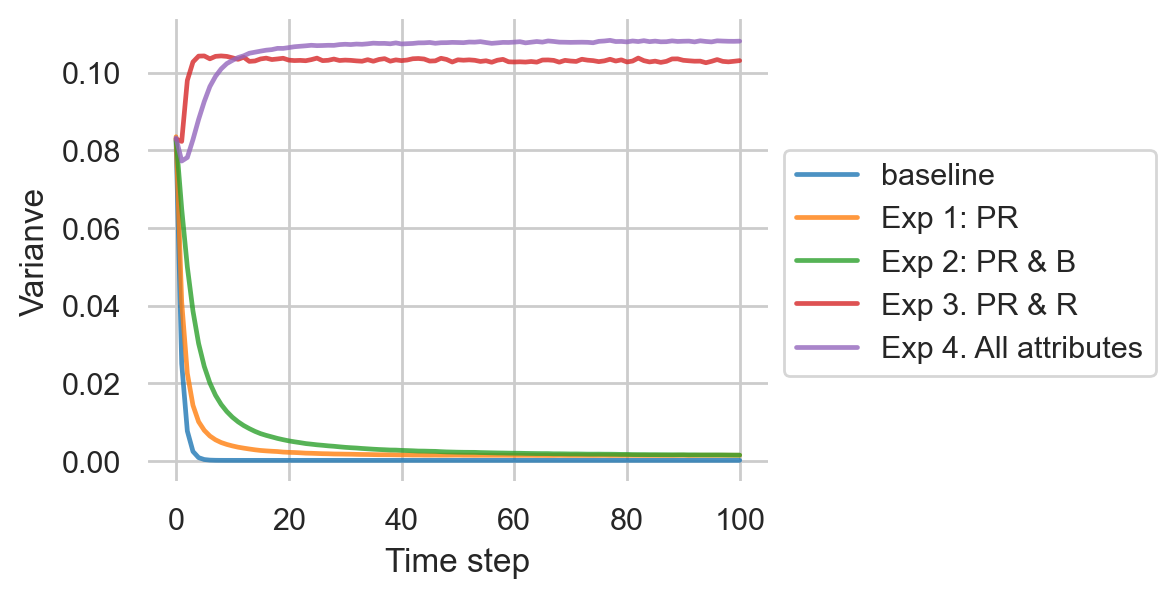

In [83]:
num_agents = len(exp5_batch['AgentID'].unique())


# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

colors = {0 : "tab:blue" , 1 : "tab:orange" , 2 : "tab:green" , 3 : "tab:red" , 4 :"tab:purple" }

sns.lineplot(x="Step", y="opinion", data=baseline_batch.groupby("Step")["opinion"].var().reset_index(), label = "baseline" , color = colors[0], linewidth = 1.7, alpha = .8)
sns.lineplot(x="Step", y="opinion", data=exp1_batch.groupby("Step")["opinion"].var().reset_index(), label = "Exp 1: PR" , color = colors[1], linewidth = 1.7, alpha = .8)
sns.lineplot(x="Step", y="opinion", data=exp2_batch.groupby("Step")["opinion"].var().reset_index(), label = "Exp 2: PR & B" , color = colors[2], linewidth = 1.7, alpha = .8)
sns.lineplot(x="Step", y="opinion", data=exp3_batch.groupby("Step")["opinion"].var().reset_index(), label = "Exp 3. PR & R" , color = colors[3], linewidth = 1.7, alpha = .8)
sns.lineplot(x="Step", y="opinion", data=exp5_batch.groupby("Step")["opinion"].var().reset_index(), label = "Exp 4. All attributes" , color = colors[4], linewidth = 1.7, alpha = .8)

# sns.lineplot(x="Step", y="opinion", data=exp5_batch.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)

# plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Varianve")

plt.legend(bbox_to_anchor=(1.65, 0.75), ncol=1)


plt.show()

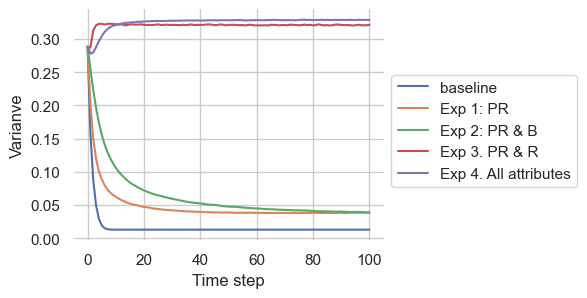

In [141]:
num_agents = len(exp5_batch['AgentID'].unique())


# figure format 
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
      
sns.lineplot(x="Step", y="opinion", data=baseline_batch.groupby("Step")["opinion"].std().reset_index(), label = "baseline")
sns.lineplot(x="Step", y="opinion", data=exp1_batch.groupby("Step")["opinion"].std().reset_index(), label = "Exp 1: PR")
sns.lineplot(x="Step", y="opinion", data=exp2_batch.groupby("Step")["opinion"].std().reset_index(), label = "Exp 2: PR & B")
sns.lineplot(x="Step", y="opinion", data=exp3_batch.groupby("Step")["opinion"].std().reset_index(), label = "Exp 3. PR & R")
sns.lineplot(x="Step", y="opinion", data=exp5_batch.groupby("Step")["opinion"].std().reset_index(), label = "Exp 4. All attributes")

# sns.lineplot(x="Step", y="opinion", data=exp5_batch.groupby("Step")["opinion"].var().reset_index() , label = "Variance" , color = 'blue', alpha = 0.4)

# plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Varianve")

plt.legend(bbox_to_anchor=(1.65, 0.75), ncol=1)


plt.show()